In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

from sklearn import datasets
# from sklearn.decomposition import PCA
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import BasicIterativeMethod

from art.config import ART_DATA_PATH
from art.utils import load_dataset, get_file
from art.estimators.classification import SklearnClassifier
# from art.attacks.evasion import HopSkipJump
from hop_skip_jump import HopSkipJump

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset('mnist')


path = get_file('mnist_cnn_original.h5', extract=False, path=ART_DATA_PATH,
                url='https://www.dropbox.com/s/p2nyzne9chcerid/mnist_cnn_original.h5?dl=1')
classifier_model = load_model(path)
classifier = KerasClassifier(clip_values=(min_, max_), model=classifier_model, use_logits=False)

num = 100
classifier_model.summary()
x_test_pred = np.argmax(classifier.predict(x_test[:num]), axis=1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test[:num], axis=1))

print(f"Original test data (first {num} images):")
print("Correctly classified: {}".format(nb_correct_pred))
print("Incorrectly classified: {}".format(num-nb_correct_pred))



Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    


In [ ]:
attacker = HopSkipJump(classifier=classifier, targeted=False, norm=np.inf, max_iter=30, max_eval=10, init_eval=10, init_size=1)
adv_num = 10
x_test_adv = attacker.generate(x_test[:adv_num])

Hop Skip Jump attack progress:   0%|          | 0/10 [00:00<?, ?it/s]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:  10%|█         | 1/10 [00:00<00:05,  1.74it/s]

initial sample started
Attack failed due to having no example with different label within the eps ball.
initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:  30%|███       | 3/10 [00:01<00:03,  2.09it/s]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:  40%|████      | 4/10 [00:01<00:02,  2.01it/s]

initial sample started
Found adv candidate example with different label, proceed to this direction.


In [9]:
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:adv_num], axis=1))


print(f"Adversarial test data (first {adv_num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(adv_num-nb_correct_adv_pred))

Adversarial test data (first 10 images):
Correctly classified: 1
Incorrectly classified: 9


Predicted label: [0 0 4 7 9 4 9 8 5 8]
True label: [7 2 1 0 4 1 4 9 5 9]


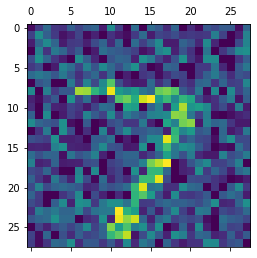

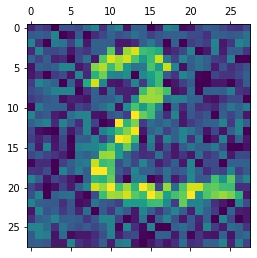

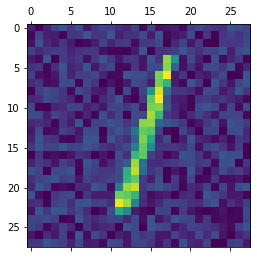

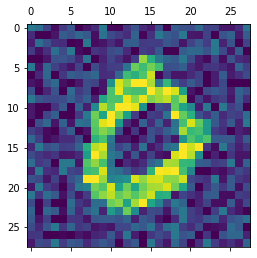

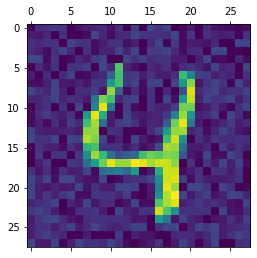

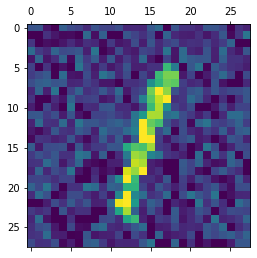

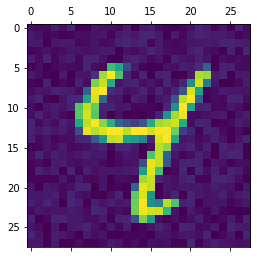

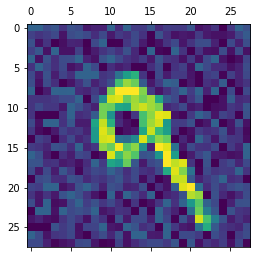

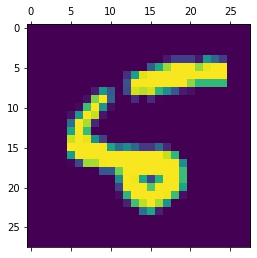

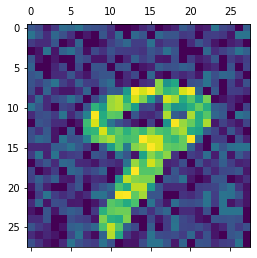

In [10]:
for i in range(adv_num):
    plt.matshow(x_test_adv[i].reshape((28, 28)));

    
print('Predicted label:', x_test_adv_pred)
print('True label:', np.argmax(y_test[:adv_num], axis=1))

Adversarial test data (first 10 images):
Correctly classified: 1
Incorrectly classified: 9


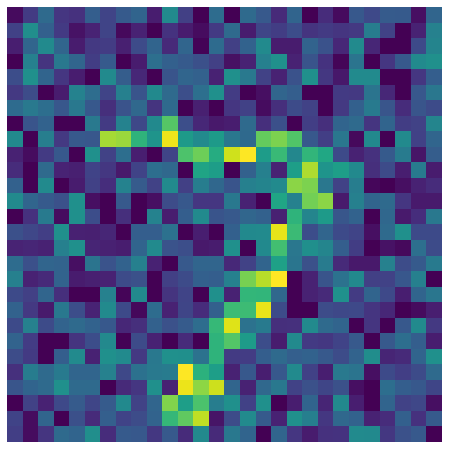

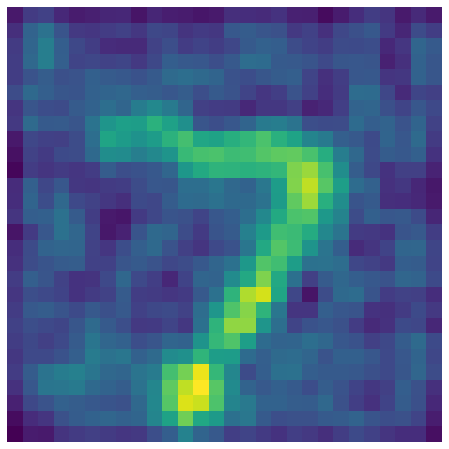

Adversarial test data (first 10 images):
Correctly classified: 9
Incorrectly classified: 1


In [14]:
test_num = 10
x_test_adv_pred = np.argmax(classifier.predict(x_test_adv), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:adv_num], axis=1))

print(f"Adversarial test data (first {adv_num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(adv_num-nb_correct_adv_pred))

from defence.SSmoothing import SpatialS
img = []

plt.figure(figsize=(8,8)); plt.imshow(x_test_adv[0]); plt.axis('off'); plt.show()

for i in range(len(x_test_adv)):
    x_dev_def = SpatialS(np.moveaxis(x_test_adv[i], 2, 0), window_size=3, way="mean")
    img.append(np.moveaxis(x_dev_def, 0, 2))
    
x_dev_def = np.array(img)

plt.figure(figsize=(8,8)); plt.imshow(x_dev_def[0]); plt.axis('off'); plt.show()

x_test_adv_pred = np.argmax(classifier.predict(x_dev_def), axis=1)
nb_correct_adv_pred = np.sum(x_test_adv_pred == np.argmax(y_test[:adv_num], axis=1))

print(f"Adversarial test data (first {adv_num} images):")
print("Correctly classified: {}".format(nb_correct_adv_pred))
print("Incorrectly classified: {}".format(adv_num-nb_correct_adv_pred))

In [25]:
import defence.detector as detector
num = 100
x_train_adv = attacker.generate(x_train[:num]) 
dmodel = detector.build_detector(classifier_model)
detector.train(dmodel, x_train[:num], x_train_adv)
detector.result(dmodel, x_test, x_test_adv)

Hop Skip Jump attack progress:   0%|          | 0/100 [00:00<?, ?it/s]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:   1%|          | 1/100 [00:01<02:15,  1.37s/it]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:   2%|▏         | 2/100 [00:02<02:14,  1.37s/it]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:   3%|▎         | 3/100 [00:04<02:13,  1.38s/it]

initial sample started
Found adv candidate example with different label, proceed to this direction.


Hop Skip Jump attack progress:   3%|▎         | 3/100 [05:22<2:53:45, 107.47s/it]


KeyboardInterrupt: 